## **Feature Extraction**

Import libraries

In [11]:
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage import data, filters

Load an image

(400, 600, 3)


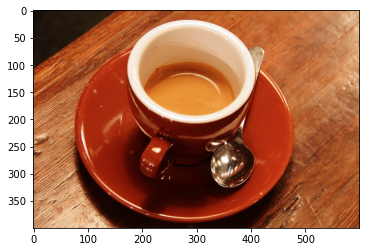

In [12]:
# skimage에서 기본으로 주어지는 이미지 불러오기
coffeeimage = data.coffee()
plt.imshow(coffeeimage)

# 크기, channel수 (RGB니까 3)
print(coffeeimage.shape)

Draw a histogram of an image

/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  after removing the cwd from sys.path.


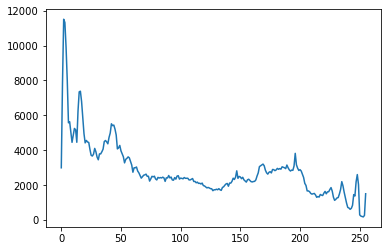

In [13]:
# histogram import해서 image주면 output 2개가 나옴
# hist(y축) : frequency, hist_centers(x축) : 각각 값이 어디있는지
from skimage.exposure import histogram
hist, hist_centers = histogram(coffeeimage)

plt.plot(hist_centers, hist)

Convert a RGB image into a grayscale image

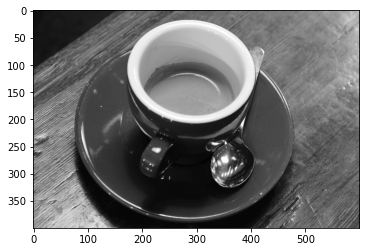

In [14]:
# color image에 바로 freq를 볼 수도 있지만, 흑백으로 보자.
from skimage.color import rgb2gray
gray_coffeeimage = rgb2gray(coffeeimage)

plt.imshow(gray_coffeeimage, cmap=plt.cm.gray)
plt.show()

Separate RGB color channels

In [15]:
# RGB channel 다 쓰고 싶다!
R = coffeeimage[:,:,0]
G = coffeeimage[:,:,1]
B = coffeeimage[:,:,2]
print(R.shape)
print(G.shape)
print(B.shape)

(400, 600)
(400, 600)
(400, 600)


Text(0.5, 1.0, 'Blue Channel')

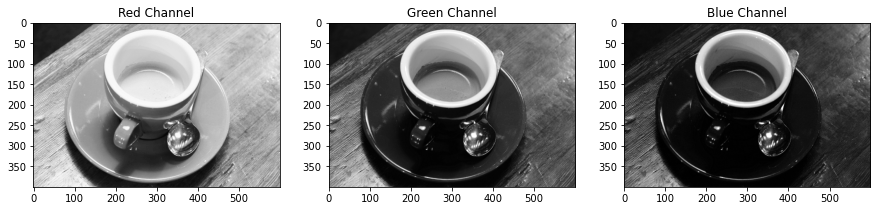

In [16]:
# intensity를 이미지로 시각화
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(R, cmap=plt.cm.gray)
plt.title('Red Channel')

plt.subplot(1,3,2)
plt.imshow(G, cmap=plt.cm.gist_gray)
plt.title('Green Channel')

plt.subplot(1,3,3)
plt.imshow(B, cmap=plt.cm.gray)
plt.title('Blue Channel')

Draw a histogram per color channel

Text(0.5, 1.0, 'Blue Channel')

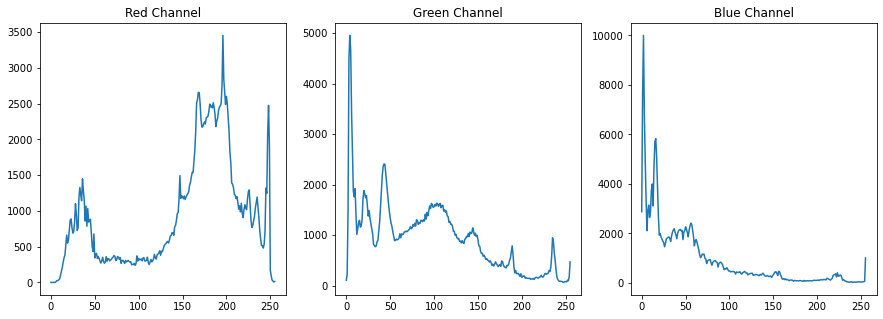

In [17]:
# 각 channel의 histogram
Rhist, Rhist_centers = histogram(R)
Ghist, Ghist_centers = histogram(G)
Bhist, Bhist_centers = histogram(B)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(Rhist_centers, Rhist)
plt.title('Red Channel')
plt.subplot(1,3,2)
plt.plot(Ghist_centers, Ghist)
plt.title('Green Channel')
plt.subplot(1,3,3)
plt.plot(Bhist_centers, Bhist)
plt.title('Blue Channel')

**Statistical Features**

Compute Skewness per color channel

In [18]:
# 얼마나 치우쳤는지, 뽀족한지.
from scipy.stats import skew, kurtosis

# reshape : 행렬 재배치. (-1,1) 열 1줄로 고정하고 행은 알아서.
# 쏠리는 방향에 따라 부호가 다르다
Rskewness = skew(R.reshape(-1,1))
Gskewness = skew(G.reshape(-1,1))
Bskewness = skew(B.reshape(-1,1))
print(Rskewness, Gskewness, Bskewness)

[-0.88732679] [0.58014964] [1.64915268]


Compute Kurtosis per color channel

In [19]:
# 첨도
Rkurtosis = kurtosis(R.reshape(-1,1))
Gkurtosis = kurtosis(G.reshape(-1,1))
Bkurtosis = kurtosis(B.reshape(-1,1))
print(Rkurtosis, Gkurtosis, Bkurtosis)

[-0.22440643] [-0.31065956] [2.61009004]


**Geometric Features**

Read image files: Normal and Cancer tissue images

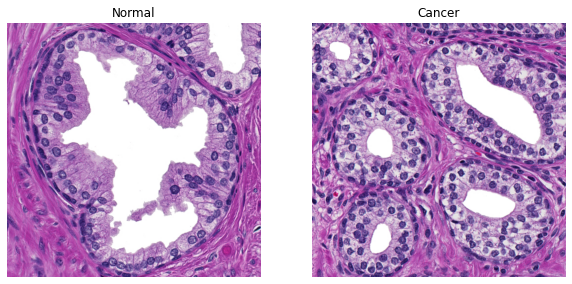

In [20]:
from skimage import io, filters
# from google.colab import drive
# drive.mount('/content/gdrive')

# 이미지 읽어오기
nimage = io.imread("./normal.jpg")
cimage = io.imread("./cancer.jpg")

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(nimage)
plt.title('Normal')
plt.axis('off') # 축 삭제
plt.subplot(1,2,2)
plt.imshow(cimage)
plt.title('Cancer')
plt.axis('off')
plt.show() # 생성된 모든 figure를 보여준다.

Smooth images

/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  
/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  This is separate from the ipykernel package so we can avoid doing imports until


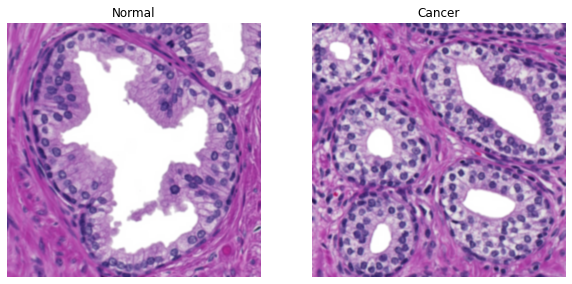

In [21]:
# smooting - 이미지를 뿌옇게 만들어서 noise때문에 pixel 단위로 튀는 값들을 없애준다.
nimage = filters.gaussian(nimage, sigma=1.5)
cimage = filters.gaussian(cimage, sigma=1.5)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(nimage)
plt.title('Normal')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cimage)
plt.title('Cancer')
plt.axis('off')
plt.show()

Convert RGB images into grayscale images

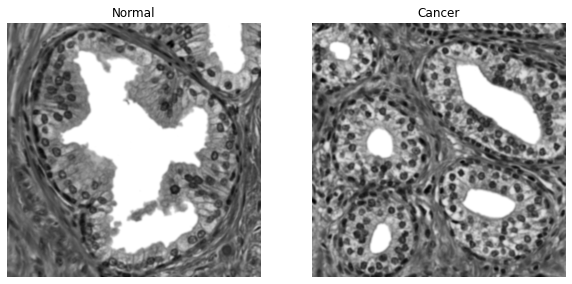

In [22]:
# grayscale 변환
gray_nimage = rgb2gray(nimage)
gray_cimage = rgb2gray(cimage)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(gray_nimage, cmap=plt.cm.gray)
plt.title('Normal')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(gray_cimage, cmap=plt.cm.gray)
plt.title('Cancer')
plt.axis('off')
plt.show()

Segment white regions

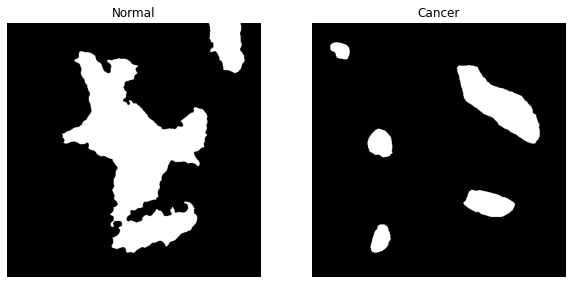

In [23]:
# Thresholding : 0.9 (grayscale: 0~1)
# 0.9 이상인 것만 가져오자
nmask = gray_nimage > 0.9
cmask = gray_cimage > 0.9

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(nmask, cmap=plt.cm.gray)
plt.title('Normal')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cmask, cmap=plt.cm.gray)
plt.title('Cancer')
plt.axis('off')
plt.show()

Find each object (white region)

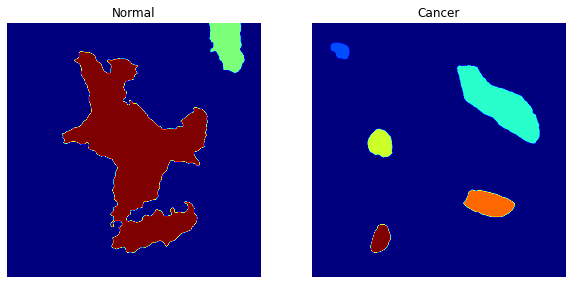

[0 1 2]
[0 1 2 3 4 5]


In [24]:
# object에서 feature 뽑기 전에 각각을 따로 표현해보자. (현재 흰색은 1, 검정은 0)
# 우리는 5개구나 알지만 pc에게는 알려줘야한다.
from skimage import measure
from skimage.color import label2rgb

# object numbering - 독립적인 개체에 유니크한 값을 준다, 번호만 불러다 사용할 수 있도록
nlabel = measure.label(nmask, background=0)
clabel = measure.label(cmask, background=0)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(nlabel, cmap=plt.cm.jet)
plt.title('Normal')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(clabel, cmap=plt.cm.jet)
plt.title('Cancer')
plt.axis('off')
plt.show()

# 안에 유니크한 값이 몇개인가? (background 합쳐서)
print(np.unique(nlabel))
print(np.unique(clabel))

Compute features per object

In [25]:
# 각각에 대해서 어떠한 값을 가지는지, 크기에 대한 숫자만 프린트 해보자
nproperties = measure.regionprops(nlabel)
print([prop.area for prop in nproperties])

cproperties = measure.regionprops(clabel)
print([prop.area for prop in cproperties])

[5243, 50328]
[985, 11829, 2193, 3890, 1640]


In [26]:
# 안에 어떤 것들이 있는지
properties = ('area', 'bbox_area', 'convex_area', 'perimeter', 'major_axis_length', 'minor_axis_length', 'orientation')

# tensor에 관련된 line
nprops = measure.regionprops_table(nlabel, properties=properties)
print(nprops)

cprops = measure.regionprops_table(clabel, properties=properties)
print(cprops)

{'area': array([ 5243, 50328]), 'bbox_area': array([  7272, 118958]), 'convex_area': array([ 5922, 86819]), 'perimeter': array([ 329.23759005, 2062.27539547]), 'major_axis_length': array([111.17518374, 418.35491717]), 'minor_axis_length': array([ 63.83160303, 227.51652741]), 'orientation': array([0.29980679, 0.33930765])}
{'area': array([  985, 11829,  2193,  3890,  1640]), 'bbox_area': array([ 1365, 26386,  2900,  5720,  2337]), 'convex_area': array([ 1043, 12996,  2263,  4026,  1702]), 'perimeter': array([122.91168825, 532.15642097, 179.09545443, 264.45079349,
       161.53910524]), 'major_axis_length': array([ 43.52947843, 220.54255844,  57.68838092, 102.84370889,
        60.22375249]), 'minor_axis_length': array([29.4891902 , 71.3016594 , 49.05169352, 48.72914482, 35.19734023]), 'orientation': array([ 0.95314438,  0.90401633,  0.44159469,  1.36006428, -0.34236239])}


In [27]:
# pandas data frame에다 데이터 넣어주면 보기 편하다
nprops_df = pd.DataFrame(nprops)
print(nprops_df)
nprops_df.loc[0] # 첫번째 개체 data만 뽑아내기

cprops_df = pd.DataFrame(cprops)
print(cprops_df)
cprops_df.loc[0] 

# 수업시간에 배운 비율들을 보는것이 낫다.
pd.DataFrame({'Normal': nprops_df.mean(), 'Cancer': cprops_df.mean()})

    area  bbox_area  convex_area    perimeter  major_axis_length  \
0   5243       7272         5922   329.237590         111.175184   
1  50328     118958        86819  2062.275395         418.354917   

   minor_axis_length  orientation  
0          63.831603     0.299807  
1         227.516527     0.339308  
    area  bbox_area  convex_area   perimeter  major_axis_length  \
0    985       1365         1043  122.911688          43.529478   
1  11829      26386        12996  532.156421         220.542558   
2   2193       2900         2263  179.095454          57.688381   
3   3890       5720         4026  264.450793         102.843709   
4   1640       2337         1702  161.539105          60.223752   

   minor_axis_length  orientation  
0          29.489190     0.953144  
1          71.301659     0.904016  
2          49.051694     0.441595  
3          48.729145     1.360064  
4          35.197340    -0.342362  


,Normal,Cancer
area,27785.500000,4107.400000
bbox_area,63115.000000,7741.600000
convex_area,46370.500000,4406.000000
perimeter,1195.756493,252.030692
major_axis_length,264.765050,96.965576
minor_axis_length,145.674065,46.753806
orientation,0.319557,0.663291
